In [45]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
import random


In [46]:
car_data = pd.read_csv('./CarPrice_Assignment.csv')

In [47]:
pd.options.display.max_columns = None
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Pre Processing

In [48]:
# ignoring car id
car_data.drop('car_ID', axis=1, inplace=True)
car_data.drop('CarName', axis=1, inplace=True)

## Categorical -> Numerical

In [49]:
car_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [50]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [51]:
# smake all object dtypes into categories, and encode
for col_name in car_data:
    if car_data[col_name].dtype == 'object':
        car_data[col_name] = car_data[col_name].astype('category')
        car_data[col_name] = car_data[col_name].cat.codes


In [52]:
car_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


# Training/Test Split

Now that categorical data has been encoded to numerical data, we can split the data set into a feature set and a target set (target set contains prices).

After this, we need to further split the data into a training set (to train our models) and a testing test (to test our models)

In [53]:
price_df = car_data['price']
feature_df = car_data.drop('price', axis=1)

In [54]:
features_np = feature_df.to_numpy(dtype='float32')
targets_np = price_df.to_numpy(dtype='float32')

In [55]:
train_len = int(features_np.shape[0] * .8)
test_len = features_np.shape[0] - train_len

X_train = torch.from_numpy(features_np[0:train_len])
X_test = torch.from_numpy(features_np[train_len: len(features_np) + 1])

Y_train = torch.from_numpy(targets_np[0:train_len])
Y_test = torch.from_numpy(targets_np[train_len: len(feature_df) + 1])

Y_train = Y_train.view(Y_train.shape[0], 1)
Y_test = Y_test.view(Y_test.shape[0], 1)


# Modelling

In [56]:
import torch.nn as nn

In [57]:
batch_size = 25
model = nn.Linear(X_train.shape[1], 1)
print(model)
print(model.weight)
print(model.bias)

Linear(in_features=23, out_features=1, bias=True)
Parameter containing:
tensor([[ 0.1463, -0.0242,  0.0608,  0.0831,  0.0354,  0.1020, -0.0920,  0.0605,
         -0.0213,  0.0568,  0.0562,  0.1575, -0.0067,  0.1153, -0.1004,  0.1302,
          0.0144, -0.1741, -0.1666, -0.1711,  0.1439,  0.0398, -0.1505]],
       requires_grad=True)
Parameter containing:
tensor([-0.1629], requires_grad=True)


In [58]:
# Define optimizer (Adam is just algorithm for gradient descent, could use SGD as well)
opt = torch.optim.Adam(model.parameters())

In [59]:
# Import nn.functional
import torch.nn.functional as F

In [60]:
# Define loss function
loss_fn = F.mse_loss

In [61]:
X_train.size()

torch.Size([164, 23])

In [62]:
loss = loss_fn(model(X_train), Y_train)
print(loss)

tensor(2.2390e+08, grad_fn=<MseLossBackward>)


In [63]:
X_train

tensor([[3.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 5.0000e+03, 2.1000e+01,
         2.7000e+01],
        [3.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 5.0000e+03, 2.1000e+01,
         2.7000e+01],
        [1.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 5.0000e+03, 1.9000e+01,
         2.6000e+01],
        ...,
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 4.8000e+03, 2.8000e+01,
         3.4000e+01],
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 4.8000e+03, 2.8000e+01,
         3.4000e+01],
        [1.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 4.8000e+03, 2.9000e+01,
         3.4000e+01]])

In [64]:
# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in zip(X_train, Y_train):
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(X_train), Y_train))

In [65]:
# Train the model for 300 epochs
fit(300, model, loss_fn, opt)

Training loss:  tensor(31370356., grad_fn=<MseLossBackward>)


# Evalutation

## Model Training

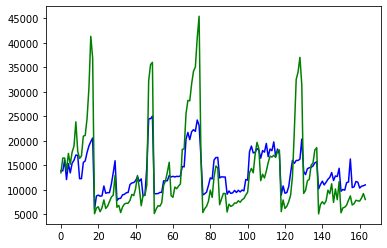

In [66]:
# Generate predictions after training
preds = model(X_train)

# blue line is model predictions
plt.plot(preds.detach().numpy(), 'b')

# green line is target value
plt.plot(Y_train.detach().numpy(), 'g')

In [68]:
loss = 0
for prediction, target in zip(preds, Y_train):
    loss += loss_fn(prediction, target)

avg_loss = loss / preds.shape[0]
avg_loss

tensor(31370356., grad_fn=<DivBackward0>)

## Model Testing

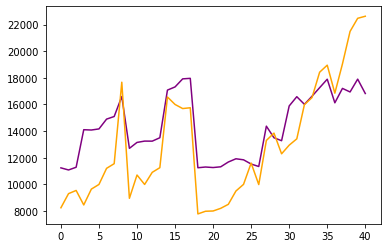

In [69]:
# Now, use model on test data and see how it performs:
test_predictions = model(X_test)

# purple line is model predictions
plt.plot(test_predictions.detach().numpy(), 'purple')

# orange line is target value`
plt.plot(Y_test.detach().numpy(), 'orange')

In [70]:
loss = 0
for prediction, target in zip(test_predictions, Y_test):
    loss += loss_fn(prediction, target)

avg_loss = loss / test_predictions.shape[0]
avg_loss


tensor(8097777., grad_fn=<DivBackward0>)